In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
tweets = pd.read_csv("vaccination_all_tweets.csv")
tweets.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [4]:
vaccines = pd.read_csv("owid-covid-data.csv")
vaccines.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [5]:
sentiments = pd.read_csv("covid-19_vaccine_tweets_with_sentiment.csv")
sentiments.head()

,tweet_id,label,tweet_text
0,1.360342e+18,1,"4,000 a day dying from the so called Covid-19 ..."
1,1.382896e+18,2,Pranam message for today manifested in Dhyan b...
2,1.375673e+18,2,Hyderabad-based ?@BharatBiotech? has sought fu...
3,1.381311e+18,1,"Confirmation that Chinese #vaccines ""don�t hav..."
4,1.362166e+18,3,"Lab studies suggest #Pfizer, #Moderna vaccines..."


In [6]:
all_tweet_data = pd.merge(sentiments, tweets, left_on = 'tweet_id', right_on = 'id')
all_tweet_data.rename(columns={'label': 'sentiment'}, inplace=True)
all_tweet_data

,tweet_id,sentiment,tweet_text,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1.382896e+18,2,Pranam message for today manifested in Dhyan b...,1382896334886248448,ANJALI KALIA,NaN,"Trustee Pranam, Humanity Nature Bharat Culture...",2009-09-23 07:36:45,660,942,28442,False,2021-04-16 03:19:13,Pranam message for today manifested in Dhyan b...,"['truth', 'love', 'karm', 'light', 'nature', '...",Twitter for iPhone,1,6,False
1,1.362166e+18,3,"Lab studies suggest #Pfizer, #Moderna vaccines...",1362165556091191296,Jeff Ostach,"Wisconsin, USA","#Writer, #Politics/#Sports, #Badgers #Packers ...",2009-03-30 16:50:40,3744,4702,65586,False,2021-02-17 22:22:31,"Lab studies suggest #Pfizer, #Moderna vaccines...","['Pfizer', 'Moderna', 'coronavirusvariant']",Twitter for iPhone,1,2,False
2,1.351285e+18,1,Still want to take the #jab?\n#PfizerBioNTech\...,1351285090077323264,Signs Of The Times,Global,Independent commentary & analysis on world eve...,2009-02-15 19:24:21,8807,1094,10100,False,2021-01-18 21:47:25,Still want to take the #jab?\n#PfizerBioNTech\...,"['jab', 'PfizerBioNTech', 'sideeffects']",Twitter Web App,6,3,False
3,1.377729e+18,2,Officially a #Moderna gay ?,1377729426784411648,Richard,"Kalamazoo, MI","Don’t shrink yourself to be digestible, let th...",2015-08-06 14:56:46,4491,1223,70158,False,2021-04-01 21:07:46,Officially a #Moderna gay 💉,['Moderna'],Twitter for iPhone,0,16,False
4,1.382048e+18,2,Abusing #atmanirbhar Bharat as a political too...,1382047921160417280,Akash Karmakar,NaN,NaN,2014-05-27 17:52:10,69,209,121,False,2021-04-13 19:07:56,Abusing #atmanirbhar Bharat as a political too...,['atmanirbhar'],Twitter for iPhone,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,1.349117e+18,2,Super excited to have gotten my first dose of ...,1349116597777043456,Tracy Jackson,"Medicine Hat, Alberta",NaN,2010-06-19 21:02:50,18,61,413,False,2021-01-12 22:10:36,Super excited to have gotten my first dose of ...,"['PfizerBioNTech', 'vaccine']",Twitter for iPhone,0,1,False
1112,1.380183e+18,3,"24 hours since second #moderna shot. So far, I...",1380182780559130624,Great Lakes Ame,NaN,Big old lefty and Bravo fan. I like good books...,2011-07-04 19:39:51,549,458,15936,False,2021-04-08 15:36:32,"24 hours since second #moderna shot. So far, I...",['moderna'],Twitter Web App,0,5,False
1113,1.375551e+18,2,Home from another good shift working at #vacci...,1375551489096175616,#HelloMyNameIs Chris 💙 #NHSBlueHeart,"East, England","paliative care nurse, cast member in the openi...",2011-07-09 09:56:02,278,1131,71339,False,2021-03-26 20:53:26,Home from another good shift working at #vacci...,"['vaccinationCentre', 'vaccine', 'vaccines', '...",Twitter for iPhone,1,3,False
1114,1.379827e+18,3,So happy to be fully vaccinated against COVID-...,1379827098811043840,"cjae, md","BGC, Taguig",🩺🧠🇵🇭 | @unicefphils',2017-04-24 16:25:46,1159,365,5411,False,2021-04-07 16:03:10,So happy to be fully vaccinated against COVID-...,['VaccinesWork'],Instagram,0,1,False


,tweet_id,sentiment,id,user_followers,user_friends,user_favourites,user_verified,retweets,favorites,is_retweet
user_location,,,,,,,,,,
,1.371979e+18,2.0,1.371979e+18,731.0,214.0,58146.0,0.0,0.0,3.0,0.0
Australia,1.381738e+18,2.0,1.381738e+18,2165.0,2216.0,41421.0,0.0,2.0,4.0,0.0
Ex-Silicon Valley lad,1.359593e+18,2.0,1.359593e+18,1331.0,5004.0,57928.0,0.0,0.0,0.0,0.0
India,1.367143e+18,3.0,1.367143e+18,1703.0,4960.0,2214.0,0.0,1.0,1.0,0.0
Los Angeles County,1.368291e+18,2.0,1.368291e+18,612.0,154.0,12.0,0.0,0.0,0.0,0.0


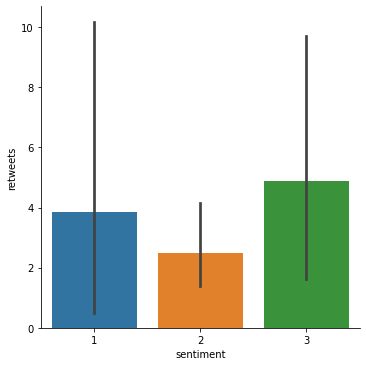

In [7]:
#sns.displot(data=all_tweet_data, x=user_followers, y=)
sns.catplot(data=all_tweet_data, x='sentiment', y='retweets', kind='bar', height=5)
all_twt_loc = all_tweet_data.groupby('user_location').aggregate('mean')
all_twt_loc.head()

In [8]:
all_data = pd.merge(all_twt_loc, vaccines, left_on = 'user_location', right_on = 'location')
all_data.groupby('location').mean()['sentiment']

location
Armenia                 2.000000
Australia               1.000000
Azerbaijan              2.000000
Belgium                 2.333333
Bulgaria                2.000000
Canada                  2.500000
Croatia                 2.000000
Cyprus                  2.000000
Europe                  2.000000
France                  2.166667
Germany                 2.000000
Greece                  2.000000
Hong Kong               1.875000
India                   2.236842
Israel                  3.000000
Kenya                   2.000000
Kuwait                  2.000000
Malaysia                1.857143
Montenegro              2.000000
Norway                  2.000000
Oman                    2.500000
Pakistan                2.000000
Philippines             2.500000
Singapore               2.000000
Somalia                 2.000000
Sri Lanka               2.000000
Thailand                3.000000
Uganda                  1.000000
United Arab Emirates    2.750000
United Kingdom          2.800000
U

In [9]:

all_tweet_locations = all_tweet_data["user_location"].tolist()
fixed_loc = []
for twt in all_tweet_locations:
    if "USA" in str(twt):
        fixed_loc.append("United States")
    else:
        fixed_loc.append(twt)
all_tweet_data["Adjusted Locations"] = fixed_loc
all_tweet_data.head()

,tweet_id,sentiment,tweet_text,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,Adjusted Locations
0,1.382896e+18,2,Pranam message for today manifested in Dhyan b...,1382896334886248448,ANJALI KALIA,NaN,"Trustee Pranam, Humanity Nature Bharat Culture...",2009-09-23 07:36:45,660,942,28442,False,2021-04-16 03:19:13,Pranam message for today manifested in Dhyan b...,"['truth', 'love', 'karm', 'light', 'nature', '...",Twitter for iPhone,1,6,False,NaN
1,1.362166e+18,3,"Lab studies suggest #Pfizer, #Moderna vaccines...",1362165556091191296,Jeff Ostach,"Wisconsin, USA","#Writer, #Politics/#Sports, #Badgers #Packers ...",2009-03-30 16:50:40,3744,4702,65586,False,2021-02-17 22:22:31,"Lab studies suggest #Pfizer, #Moderna vaccines...","['Pfizer', 'Moderna', 'coronavirusvariant']",Twitter for iPhone,1,2,False,United States
2,1.351285e+18,1,Still want to take the #jab?\n#PfizerBioNTech\...,1351285090077323264,Signs Of The Times,Global,Independent commentary & analysis on world eve...,2009-02-15 19:24:21,8807,1094,10100,False,2021-01-18 21:47:25,Still want to take the #jab?\n#PfizerBioNTech\...,"['jab', 'PfizerBioNTech', 'sideeffects']",Twitter Web App,6,3,False,Global
3,1.377729e+18,2,Officially a #Moderna gay ?,1377729426784411648,Richard,"Kalamazoo, MI","Don’t shrink yourself to be digestible, let th...",2015-08-06 14:56:46,4491,1223,70158,False,2021-04-01 21:07:46,Officially a #Moderna gay 💉,['Moderna'],Twitter for iPhone,0,16,False,"Kalamazoo, MI"
4,1.382048e+18,2,Abusing #atmanirbhar Bharat as a political too...,1382047921160417280,Akash Karmakar,NaN,NaN,2014-05-27 17:52:10,69,209,121,False,2021-04-13 19:07:56,Abusing #atmanirbhar Bharat as a political too...,['atmanirbhar'],Twitter for iPhone,0,1,False,NaN


In [27]:
new_all_data = pd.merge(all_tweet_data, vaccines, left_on = "user_location", right_on = 'location')
#new_all_data.groupby('Adjusted Locations').mean()['sentiment']

test_all_twt_loc = all_tweet_data.groupby('Adjusted Locations').aggregate('mean')
test_all_twt_loc.head()

all_data2 = pd.merge(test_all_twt_loc, vaccines, left_on = 'Adjusted Locations', right_on = 'location')
all_data2.head()
vaxandtweet = all_data2.groupby('location').aggregate({'sentiment': 'mean', 'people_vaccinated_per_hundred': 'max'})
vaxandtweet.head()
#sns.catplot(data=vaxandtweet, y='sentiment', kind='bar')

,sentiment,people_vaccinated_per_hundred
location,,
Armenia,2.000000,1.57
Australia,1.000000,24.13
Azerbaijan,2.000000,21.10
Belgium,2.333333,60.51
Bulgaria,2.000000,13.60


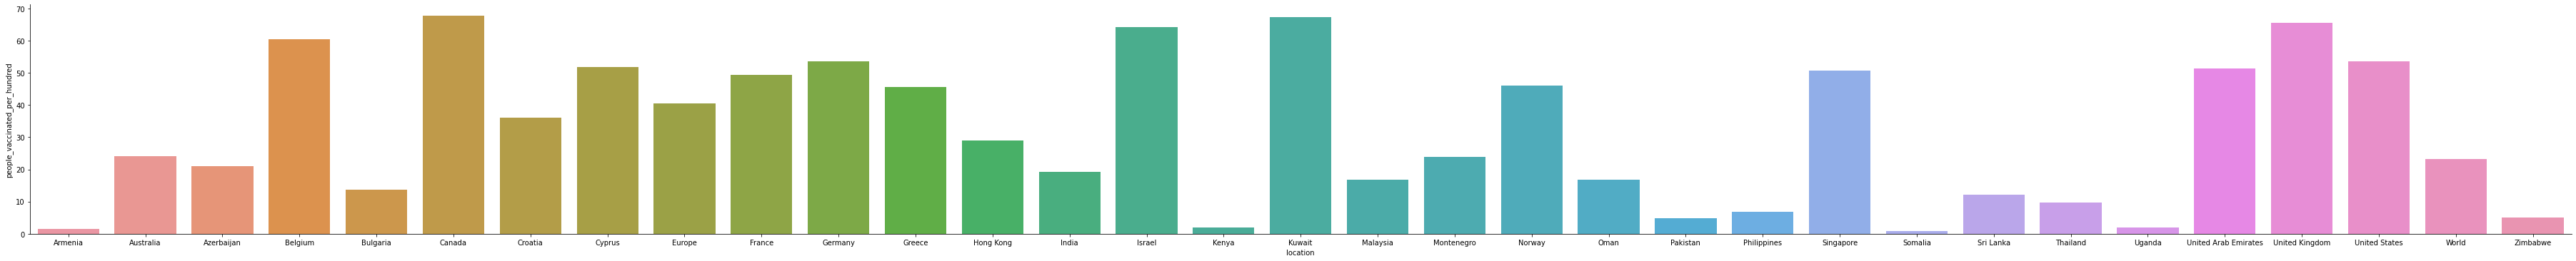

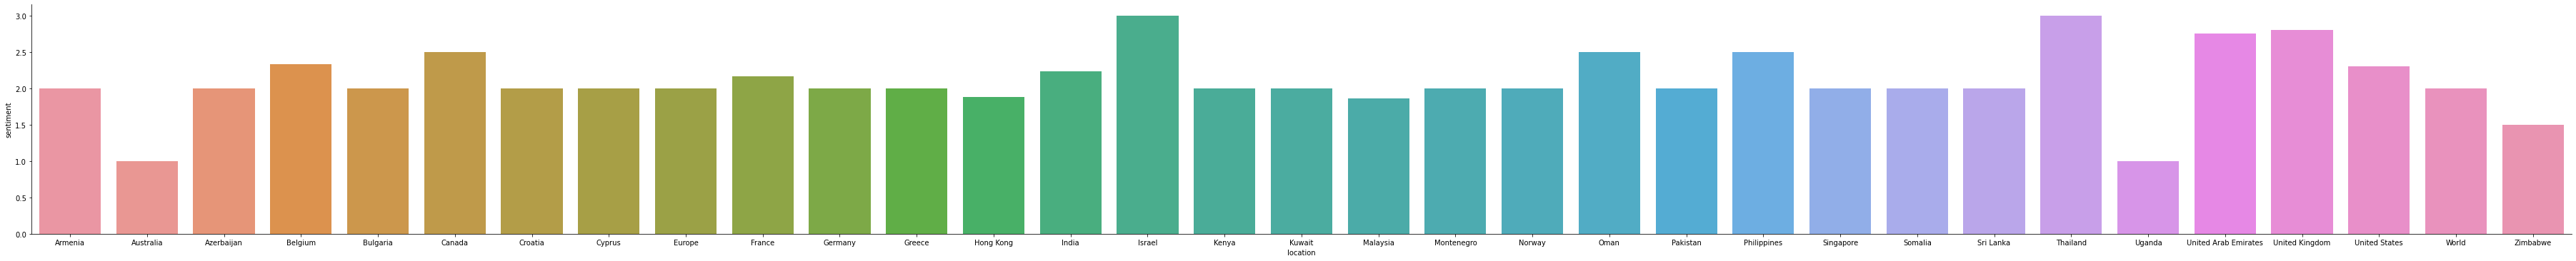

In [36]:
#all_data2["people_vaccinated_per_hundred"]
sns.catplot(data=vaxandtweet, x=vaxandtweet.index, y='people_vaccinated_per_hundred', kind='bar', aspect=10)
sns.catplot(data=vaxandtweet, x=vaxandtweet.index, y='sentiment', kind='bar', aspect=10)